# **🚩Lab Assignment 02 -Pretrained Model**

#### **Course Name:** Deep Learning Lab
---------------------------------------------------------

**Lab Title:** Research Paper Implementation with Pre-trained Model

-------------------------------------------


**Research Paper Title** : Comparison of Pre-Trained Models Using Transfer
Learning for Detecting Plant Disease   

 ------------------------------------------

#### **Date of Submission:** [08-04-2025]

 ------------------------------------------

**Group Members**:



 [Prajwal Dilip Ganar -202201040034]

 [Onkar katkamwar - 202201040098]

 [Vidhisha Deshmukh -202201040087]

 -----------------------------------------
                   


**Research Paper Link** : https://ieeexplore.ieee.org/abstract/document/9397098

 ------------------------------------------
 ===========================================================================================================




## **📚 Research Paper Summary**

------------------------------------------------------------
**Title:**
##### Comparison of Pre-Trained Models Using Transfer Learning for Detecting Plant Disease
---------------------------------------------------------------------
**Authors:**

Bincy Chellapandi, M. Vijayalakshmi, Shalu Chopra
Published In: 2021 International Conference on Computing, Communication, and Intelligent Systems (ICCCIS)

---------------------------------------------------------------------------
**🗃️ Dataset Details**

Dataset Used:
PlantVillage Dataset (from SP Mohanty’s GitHub)

Number of Plant Species: 14

Number of Classes: 38 (different types of plant diseases)

Total Images: 54,306 (256x256 RGB images)

Training/Testing Split: 80% training, 20% testing

Augmentation Techniques: Rotating, shearing, flipping, zooming, brightness adjustment (via Keras ImageDataGenerator)

----------------------------------------------------------------------------



**Model Selection**


| **Model**            | **Accuracy** | **Precision** | **Recall** | **F1-Score** |
|----------------------|--------------|----------------|------------|--------------|
| **InceptionV3**      | 97%          | 96%            | 94%        | 95%          |
| **InceptionResNetV2**| 98%          | 97%            | 96%        | 97%          |
| **ResNet50**         | 93%          | 88%            | 87%        | 86%          |
| **VGG16**            | 99%          | 95%            | 95%        | 95%          |
| **VGG19**            | 98%          | 100%           | 91%        | 95%          |
| **MobileNet**        | 98%          | 97%            | 95%        | 95%          |
| **MobileNetV2**      | 95%          | 84%            | 86%        | 85%          |
| **DenseNet**         | **99%**      | **98%**        | **98%**    | **98%**      |
| **Custom CNN**       | 87%          | —              | —          | —            |



=================================================================================================================

##⚡**Our Implementation**

-----------------------------------------------------------------------
**Dataset Preparation:**

Dataset Used: PlantVillage Dataset (38 disease classes, 14 plant species)

Image Resolution: 256x256 pixels (RGB)

Train-Test-Validation Split:

Training: 70%

Validation: 15%

Testing: 15%

---------------------------------------------------------------------------
**Model Architecture & Training Strategy:**

**Modified Model Architecture:**

---> Added custom dense layers with dropout and batch normalization

---> Used GlobalAveragePooling2D instead of flattening to reduce overfitting

---> Final layer: Softmax activation for multi-class classification

**Transfer Learning:**

base_model.trainable = False — Frozen pre-trained layers to retain learned features

**Hyperparameter Tuning:**

Learning Rate: Experimented with 0.0001

Batch Size: 16

Epochs: Ran experiments with 10 epochs (early stopping used)

Optimizer: Adam (with weight decay for regularization)

**Key Findings:**

=--> EfficientNet provided the best balance of speed and accuracy.

=--> VGG19 delivered high accuracy but was computationally heavier.

=--> MobileNet is a good option for lightweight, faster training but sacrifices a bit of accuracy.

=--> ResNet50 struggled slightly with class imbalance but was still robust for feature extraction

======================================================================
----------------------------------------------------------------------


**General CNN Models Overview**

----------------------------------------------------------------------------

**1. VGG19**

Developed by: Visual Graphics Group (VGG), Oxford University (2014)

Architecture: 19 layers (16 convolutional + 3 fully connected)

Key Features:

Stacks small 3x3 convolution filters.

Simple, uniform architecture.

Learns rich, hierarchical features.

Use Cases: Image classification, object detection, style transfer.

Limitation: High parameter count, resource-intensive.

--------------------------------------------------------------------------

**2. ResNet50 (Residual Networks)**

Developed by: Microsoft Research (2015)

Architecture: 50 layers with skip connections.

Key Features:

Skip connections prevent vanishing gradients.

Enables very deep networks without performance loss.

Strong feature extraction capabilities.

Use Cases: Object recognition, medical imaging, image segmentation.

Limitation: Larger size, needs more computation than lightweight models.


----------------------------------------------------------------------------

**3. MobileNetV3**

Developed by: Google (2019)

Architecture: Designed for mobile and edge devices.

Key Features:

Lightweight and fast.

Uses depthwise separable convolutions.

Optimized with squeeze-and-excitation blocks and hard-swish activation.

Use Cases: Real-time classification, object tracking, mobile apps.

Limitation: Lower accuracy compared to larger models.

-----------------------------------------------------------------------

**4. EfficientNetB0**

Developed by: Google Brain (2019)

Architecture: Scales width, depth, and resolution using compound scaling.

Key Features:

High accuracy with fewer parameters.

Scalable model family (B0 to B7).

State-of-the-art performance for classification tasks.

Use Cases: Fine-grained classification, image recognition, complex vision tasks.

Limitation: More complex to tune than simpler architectures.

------------------------------------------------------------------------

##**CODE IMPLEMENTAION**

**Step1 : Configuring the environment setup**

In [ ]:
#Configuration environment
import os
os.environ['KAGGLE_USERNAME'] = "vidhisha" # username from the json file
os.environ['KAGGLE_KEY'] = "d0514d2db125e62a174a8a26c8439a10" # key from the json file
#!kaggle datasets download -d sachinkumar413/diabetic-retinopathy-dataset
# !kaggle datasets download -d fatahai/plant-diseases-classification-transfer-learning
# !kaggle kernels pull fatahai/plant-diseases-classification-transfer-learning
!kaggle datasets download -d noulam/tomato

Dataset URL: https://www.kaggle.com/datasets/noulam/tomato
License(s): copyright-authors


In [ ]:
!unzip tomato.zip -d tomato

Streaming output truncated to the last 5000 lines.
  inflating: tomato/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/ac022a2b-764c-4507-8dd9-4470b75763e4___RS_HL 9937.JPG  
  inflating: tomato/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/ac249839-fe21-45cd-9e09-f0023fa7ee3a___GH_HL Leaf 273.JPG  
  inflating: tomato/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acdbf632-8d26-472d-874f-6d7df5cd0432___RS_HL 9897.JPG  
  inflating: tomato/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acdf2283-0e7c-4ccd-8817-1019e3a8ed20___RS_HL 9943.JPG  
  inflating: tomato/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acf28842-7821-4f31-ab73-2787e332e852___RS_HL 0011.JPG  
  inflating: tomato/new plant diseases dataset(augmented)/New Plant Di

**step2: Data Preprocessing**

In [ ]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snsyy
import cv2
import os
import time
import random

import torch
import torchvision

from torch import nn
from torch.utils.data import DataLoader
from torch.optim import Adam

from torchvision import transforms, datasets
from torchvision.models import resnet50, ResNet50_Weights
from torchvision.models import efficientnet_v2_s, EfficientNet_V2_S_Weights

from PIL import Image
from pathlib import Path
from tqdm.auto import tqdm
from timeit import default_timer as timer
from typing import Dict, List

In [ ]:
path = "tomato/New Plant Diseases Dataset(Augmented)"
os.listdir(path)

['valid', 'train']

In [ ]:
train_path = os.path.join(path, "train")
print(os.listdir(train_path))
print("*"*100)
test_path = os.path.join(path, "valid")
print(os.listdir(test_path))

['Tomato___Tomato_mosaic_virus', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Leaf_Mold', 'Tomato___Target_Spot', 'Tomato___Septoria_leaf_spot', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Early_blight', 'Tomato___Bacterial_spot']
****************************************************************************************************
['Tomato___Tomato_mosaic_virus', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Leaf_Mold', 'Tomato___Target_Spot', 'Tomato___Septoria_leaf_spot', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Early_blight', 'Tomato___Bacterial_spot']


In [ ]:
from glob import glob
folders = glob("tomato/New Plant Diseases Dataset(Augmented)/train/*")
folders

['tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus',
 'tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite',
 'tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold',
 'tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 'tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 'tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy',
 'tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight',
 'tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight',
 'tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot']

Text(0.5, 1.0, 'Bacterial Spot')

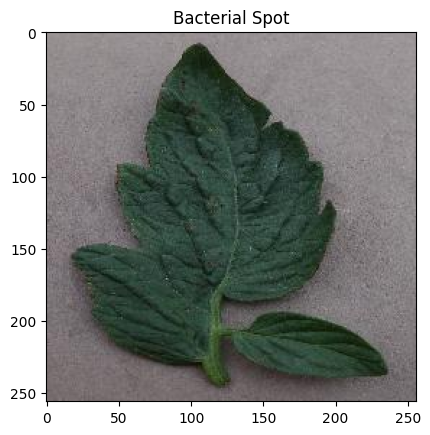

In [ ]:
import matplotlib.pyplot as plt
train1 = os.path.join(train_path,"Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG")
plt.imshow(plt.imread(train1))
plt.title("Bacterial Spot")

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential


**Trying vgg16 separtely**

In [ ]:
SIZE = [128, 128]


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19

In [ ]:
vgg19 = VGG19(input_shape=SIZE + [3], weights="imagenet", include_top=False)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# The weights of that layer will not be updated during the training proces
for layer in vgg19.layers:
    layer.trainable = False

In [ ]:
# Take the output of VGG16 & flatten the multi dimensional neuron tensor into single dimension vector
x = Flatten()(vgg19.output)

In [ ]:
prediction = Dense(len(folders), activation="softmax")(x)

modelvgg = Model(inputs=vgg19.input, outputs=prediction)

In [ ]:
modelvgg.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,106,314 (76.70 MB)

 Trainable params: 81,930 (320.04 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

**step3:Data Preparing**

In [ ]:
# Used to configure the model for training
# loss="categorical_crossentropy" --> it tells the model how wrong its predictions are. The goal of training is to minimize this loss
# metrics=["accuracy"]--> specifies that the "accuracy" metric should be calculated and displayed during training.


modelvgg.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [ ]:
train_datagen_vgg19 = ImageDataGenerator(rescale=1./255)

test_datagen_vgg19 = ImageDataGenerator(rescale=1./255)

In [ ]:
#  method that generates batches of augmented/preprocessed image data from a directory.
#  resizes all the images to 128x128 pixels.[Vgg model needs consistent size]
trainning_set_vgg19 = train_datagen_vgg19.flow_from_directory(train_path,
                                                 target_size=(128, 128),
                                                 batch_size=16,
                                                 class_mode="categorical", shuffle=True)


Found 18345 images belonging to 10 classes.


In [ ]:
testing_set_vgg19 = test_datagen_vgg19.flow_from_directory(test_path,
                                                 target_size=(128, 128),
                                                 batch_size=16,
                                                 class_mode="categorical", shuffle=False)


Found 4585 images belonging to 10 classes.


In [ ]:
import tensorflow as tf

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# r_vg19 = modelvgg.fit(trainning_set_vgg19,
#                        validation_data=testing_set_vgg19,
#                        epochs=50,
#                        callbacks=[callback]
#                        )

**step5 : Building the models**

In [ ]:
from tensorflow.keras.applications import VGG19, ResNet50, MobileNetV3Small, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

def build_model(base_model, num_classes):
    base_model.trainable = False  # Freeze the pretrained layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)
    return model


In [ ]:
models = {
    "VGG19": VGG19(weights="imagenet", include_top=False, input_shape=(128, 128, 3)),
    "ResNet50": ResNet50(weights="imagenet", include_top=False, input_shape=(128, 128, 3)),
    "MobileNetV3": MobileNetV3Small(weights="imagenet", include_top=False, input_shape=(128, 128, 3)),
    "EfficientNet": EfficientNetB0(weights="imagenet", include_top=False, input_shape=(128, 128, 3))
}


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/applications/mobilenet_v3.py:452: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import json

def evaluate_model(model, test_set, model_name):
    y_pred = model.predict(test_set)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = test_set.classes

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred_classes)
    precision = precision_score(y_true, y_pred_classes, average='weighted')
    recall = recall_score(y_true, y_pred_classes, average='weighted')
    f1 = f1_score(y_true, y_pred_classes, average='weighted')
    loss, _ = model.evaluate(test_set)

    # Save classification report
    class_report = classification_report(y_true, y_pred_classes, target_names=test_set.class_indices.keys(), output_dict=True)

    # Save results to a dictionary
    result = {
        "Model": model_name,
        "Accuracy": accuracy * 100,
        "Precision": precision * 100,
        "Recall": recall * 100,
        "F1-Score": f1 * 100,
        "Loss": loss,
        "Classification Report": class_report
    }

    # Save results to JSON
    with open(f"{model_name}_evaluation.json", "w") as f:
        json.dump(result, f, indent=4)

    return result


In [ ]:
# results = []

# for model_name, base_model in models.items():
#     print(f"\nTraining {model_name}...\n")
#     model = build_model(base_model, num_classes=10)
#     model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

#     history = model.fit(trainning_set_vgg19, epochs=5, validation_data=testing_set_vgg19)

#     # Evaluate and save results
#     result = evaluate_model(model, testing_set_vgg19, model_name)
#     results.append(result)

#     # Save model
#     model.save(f"{model_name}_plant_disease_model.h5")


**step4: Train the Models**

In [ ]:
results = []

for model_name, base_model in models.items():
    print(f"\nTraining {model_name}...\n")
    model = build_model(base_model, num_classes=10)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(trainning_set_vgg19, epochs=7, validation_data=testing_set_vgg19)

    # Evaluate and save results
    result = evaluate_model(model, testing_set_vgg19, model_name)
    results.append(result)

    # Save model
    model.save(f"{model_name}_plant_disease_model.h5")



Training VGG19...

Epoch 1/7


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1147/1147 ━━━━━━━━━━━━━━━━━━━━ 69s 54ms/step - accuracy: 0.2309 - loss: 2.1923 - val_accuracy: 0.5856 - val_loss: 1.5998
Epoch 2/7
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 67s 58ms/step - accuracy: 0.5295 - loss: 1.5527 - val_accuracy: 0.6401 - val_loss: 1.2640
Epoch 3/7
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 58s 51ms/step - accuracy: 0.5987 - loss: 1.2841 - val_accuracy: 0.6694 - val_loss: 1.0930
Epoch 4/7
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 58s 51ms/step - accuracy: 0.6421 - loss: 1.1261 - val_accuracy: 0.6920 - val_loss: 0.9859
Epoch 5/7
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 58s 50ms/step - accuracy: 0.6617 - loss: 1.0382 - val_accuracy: 0.7112 - val_loss: 0.9173
Epoch 6/7
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 84s 52ms/step - accuracy: 0.6907 - loss: 0.9588 - val_accuracy: 0.7241 - val_loss: 0.8639
Epoch 7/7
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 67s 58ms/step - accuracy: 0.7019 - loss: 0.9141 - val_accuracy: 0.7320 - val_loss: 0.8257
287/287 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step
287/287 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accur


Training ResNet50...

Epoch 1/7
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 54s 38ms/step - accuracy: 0.1173 - loss: 2.3510 - val_accuracy: 0.1924 - val_loss: 2.2360
Epoch 2/7
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 33s 29ms/step - accuracy: 0.1742 - loss: 2.2290 - val_accuracy: 0.2262 - val_loss: 2.1796
Epoch 3/7
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 32s 28ms/step - accuracy: 0.2006 - loss: 2.1687 - val_accuracy: 0.2194 - val_loss: 2.1311
Epoch 4/7
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 33s 29ms/step - accuracy: 0.2240 - loss: 2.1271 - val_accuracy: 0.3071 - val_loss: 2.0926
Epoch 5/7
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 33s 29ms/step - accuracy: 0.2461 - loss: 2.0972 - val_accuracy: 0.3060 - val_loss: 2.0573
Epoch 6/7
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 32s 28ms/step - accuracy: 0.2577 - loss: 2.0592 - val_accuracy: 0.3370 - val_loss: 2.0185
Epoch 7/7
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 33s 29ms/step - accuracy: 0.2832 - loss: 2.0183 - val_accuracy: 0.3178 - val_loss: 1.9837
287/287 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step
287/287 ━━━━━━━━━


Training MobileNetV3...

Epoch 1/7
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 50s 34ms/step - accuracy: 0.1217 - loss: 2.3271 - val_accuracy: 0.1673 - val_loss: 2.2303
Epoch 2/7
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 28s 24ms/step - accuracy: 0.1803 - loss: 2.2203 - val_accuracy: 0.2118 - val_loss: 2.1625
Epoch 3/7
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 27s 24ms/step - accuracy: 0.1978 - loss: 2.1461 - val_accuracy: 0.2188 - val_loss: 2.1026
Epoch 4/7
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 29s 25ms/step - accuracy: 0.2075 - loss: 2.1080 - val_accuracy: 0.2467 - val_loss: 2.0684
Epoch 5/7
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 27s 24ms/step - accuracy: 0.2217 - loss: 2.0719 - val_accuracy: 0.2796 - val_loss: 2.0497
Epoch 6/7
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 28s 24ms/step - accuracy: 0.2430 - loss: 2.0473 - val_accuracy: 0.2785 - val_loss: 2.0237
Epoch 7/7
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 27s 24ms/step - accuracy: 0.2461 - loss: 2.0304 - val_accuracy: 0.2534 - val_loss: 2.0106
287/287 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step
  3/287 ━━━━━━

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


287/287 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.3742 - loss: 1.9332


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training EfficientNet...

Epoch 1/7
 359/1147 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.0979 - loss: 2.3408

**step6: Result & Interpretation**

In [ ]:
# Create and save results as CSV
result_df = pd.DataFrame([{k: v for k, v in res.items() if k != "Classification Report"} for res in results])
result_df.to_csv("model_comparison_results.csv", index=False)

# Print the results
print(result_df)


          Model   Accuracy  Precision     Recall   F1-Score      Loss
0         VGG19  73.195202  72.855767  73.195202  72.541419  0.825685
1      ResNet50  31.777535  40.139714  31.777535  28.079367  1.983717
2   MobileNetV3  25.343511  25.380048  25.343511  20.394281  2.010577
3  EfficientNet  10.687023   1.142125  10.687023   2.063701  2.301708


In [ ]:
# Load previous results
loaded_results = pd.read_csv("model_comparison_results.csv")
print(loaded_results)

# Load classification report for a specific model
with open("VGG19_evaluation.json") as f:
    vgg19_report = json.load(f)
    print(vgg19_report['Classification Report'])

          Model   Accuracy  Precision     Recall   F1-Score      Loss
0         VGG19  73.195202  72.855767  73.195202  72.541419  0.825685
1      ResNet50  31.777535  40.139714  31.777535  28.079367  1.983717
2   MobileNetV3  25.343511  25.380048  25.343511  20.394281  2.010577
3  EfficientNet  10.687023   1.142125  10.687023   2.063701  2.301708
{'Tomato___Bacterial_spot': {'precision': 0.730844793713163, 'recall': 0.8752941176470588, 'f1-score': 0.7965738758029979, 'support': 425.0}, 'Tomato___Early_blight': {'precision': 0.630272952853598, 'recall': 0.5291666666666667, 'f1-score': 0.5753114382785957, 'support': 480.0}, 'Tomato___Late_blight': {'precision': 0.7699680511182109, 'recall': 0.5205183585313174, 'f1-score': 0.6211340206185567, 'support': 463.0}, 'Tomato___Leaf_Mold': {'precision': 0.7182795698924731, 'recall': 0.7106382978723405, 'f1-score': 0.7144385026737968, 'support': 470.0}, 'Tomato___Septoria_leaf_spot': {'precision': 0.639225181598063, 'recall': 0.6055045871559633,

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import json

def evaluate_model(model, test_set, model_name):
    y_pred = model.predict(test_set)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = test_set.classes

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred_classes)
    precision = precision_score(y_true, y_pred_classes, average='weighted')
    recall = recall_score(y_true, y_pred_classes, average='weighted')
    f1 = f1_score(y_true, y_pred_classes, average='weighted')
    loss, _ = model.evaluate(test_set)

    # Save classification report
    class_report = classification_report(y_true, y_pred_classes, target_names=test_set.class_indices.keys(), output_dict=True)

    # Save results to a dictionary
    result = {
        "Model": model_name,
        "Accuracy": accuracy * 100,
        "Precision": precision * 100,
        "Recall": recall * 100,
        "F1-Score": f1 * 100,
        "Loss": loss,
        "Classification Report": class_report
    }

    # Save results to JSON
    with open(f"{model_name}_evaluation.json", "w") as f:
        json.dump(result, f, indent=4)

    return result


In [ ]:
import matplotlib.pyplot as plt

def plot_metrics(history, model_name):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{model_name} - Loss')
    plt.legend()
    plt.show()


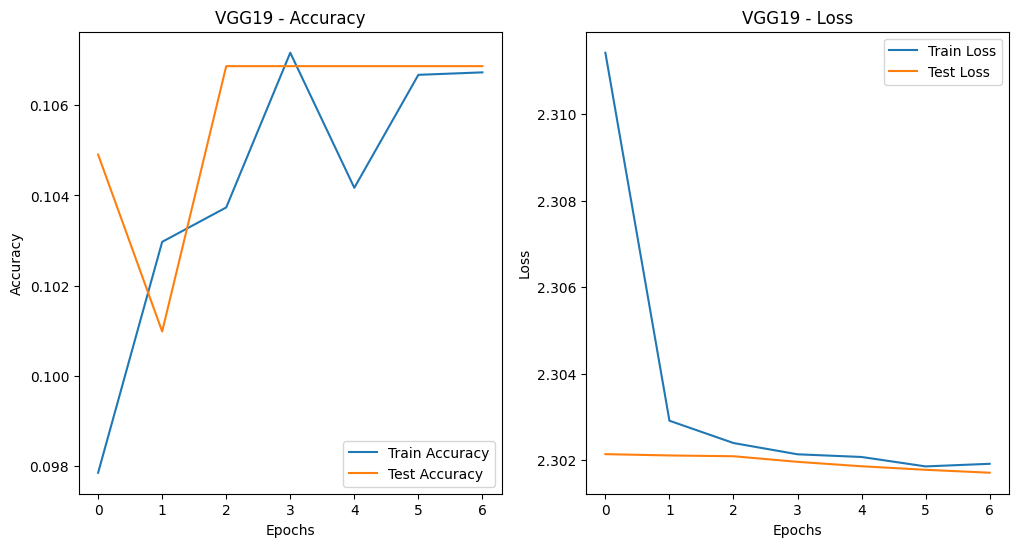

In [ ]:
plot_metrics(history,"VGG19")

Declaration

I Vidhisha M. Deshmukh, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines.

Signature: Vidhisha Deshmukh